# **001 Importing Dependencies**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL                          #PIL is image library in python
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Loading data to pandas DataFrame
# from google.colab import drive
# drive.mount('/content/drive')

download flower dataset from google

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir ='.',untar=True)

In [4]:
archive

'./datasets/flower_photos'

In [5]:
data_dir = archive

In [6]:
data_dir

'./datasets/flower_photos'

In [7]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir 

# PosixPath is unix oprating system

PosixPath('datasets/flower_photos')

In [8]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/sunflowers/4664737020_b4c61aacd3_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4895124535_11a2bb704c_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/19697910486_0086d893a2.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9431890901_cd11bda584_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8174972548_0051c2d431.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15118243470_7e0a7f159c_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5339004958_a0a6f385fd_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20406385204_469f6749e2_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3146795631_d062f233c1.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4933229889_c5d9e36392.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6125761554_4e72819ce4_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9610371852_179e7781ce.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/16967372357_15b1b9a812_n.jpg'),
 Posi

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [10]:
# To get list of all rose images
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9167147034_0a66ee3616_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/15277801151_5ed88f40f0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16152205512_9d6cb80fb6.jpg')]

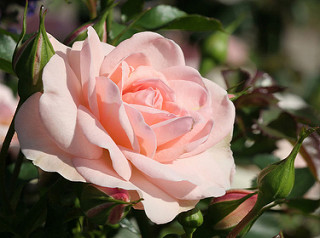

In [11]:
PIL.Image.open(str(roses[0]))

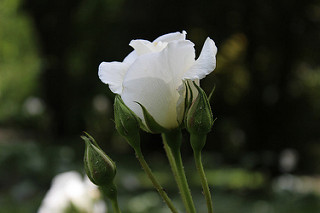

In [12]:
PIL.Image.open(str(roses[1]))

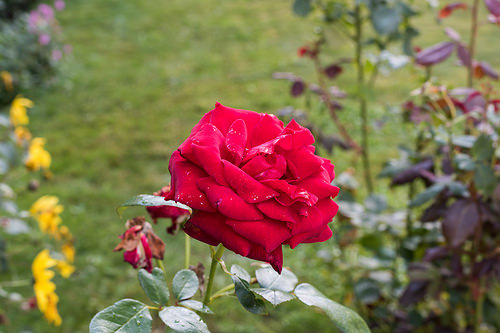

In [13]:
PIL.Image.open(str(roses[2]))

In [14]:
# To get list of all rose images
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/3529889389_ab4cb6c43b.jpg'),
 PosixPath('datasets/flower_photos/tulips/14957470_6a8c272a87_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/6876631336_54bf150990.jpg'),
 PosixPath('datasets/flower_photos/tulips/14124669683_7fb74f20c3.jpg'),
 PosixPath('datasets/flower_photos/tulips/450607536_4fd9f5d17c_m.jpg')]

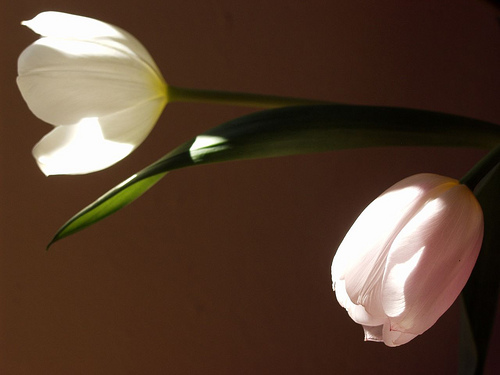

In [15]:
PIL.Image.open(str(tulips[0]))

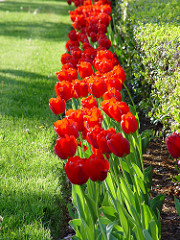

In [16]:
PIL.Image.open(str(tulips[1]))

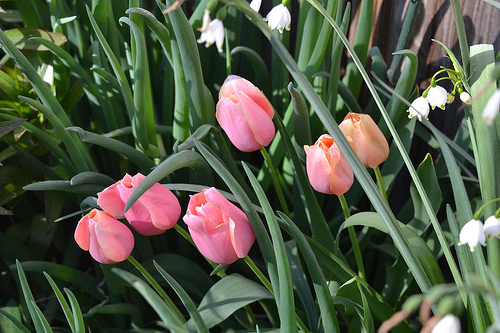

In [17]:
PIL.Image.open(str(tulips[2]))

Read flowers images from disk into numpy array using opencv

In [18]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [19]:
flowers_images_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/4993492878_11fd4f5d12.jpg'),
 PosixPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 PosixPath('datasets/flower_photos/daisy/5869147563_66fb88119d.jpg'),
 PosixPath('datasets/flower_photos/daisy/520752848_4b87fb91a4.jpg'),
 PosixPath('datasets/flower_photos/daisy/3494265422_9dba8f2191_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8681746439_d6beeefbf9.jpg'),
 PosixPath('datasets/flower_photos/daisy/4534460263_8e9611db3c_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8709535323_a6bea3e43f.jpg'),
 PosixPath('datasets/flower_photos/daisy/8706810197_17b6c1f1e7.jpg'),
 PosixPath('datasets/flower_photos/daisy/14507818175_05219b051c_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/6864242336_0d12713fe5_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/3999978867_c67c79597f_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/14307766919_fac3c37a6b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/13901930939_a7733c03f0_n.jpg'),
 Po

In [20]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [21]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/909277823_e6fb8cb5c8_n.jpg'

In [22]:
flowers_images_dict['daisy'][0]

PosixPath('datasets/flower_photos/daisy/4993492878_11fd4f5d12.jpg')

In [23]:
import cv2
img =cv2.imread(str(flowers_images_dict['roses'][0]))

In [24]:
img

array([[[ 12,  14,  14],
        [ 11,  13,  13],
        [  7,  12,  11],
        ...,
        [ 28,  49,  41],
        [ 26,  47,  39],
        [ 25,  46,  38]],

       [[ 12,  17,  16],
        [ 11,  16,  15],
        [  9,  14,  13],
        ...,
        [ 29,  52,  44],
        [ 30,  51,  43],
        [ 29,  50,  42]],

       [[ 13,  19,  18],
        [ 12,  18,  17],
        [ 10,  16,  15],
        ...,
        [ 29,  53,  45],
        [ 29,  52,  44],
        [ 29,  52,  44]],

       ...,

       [[  0,   7,   0],
        [  0,   7,   0],
        [  0,   7,   0],
        ...,
        [ 50,  71,  72],
        [ 60,  80,  81],
        [ 69,  89,  90]],

       [[  0,   7,   0],
        [  0,   7,   0],
        [  0,   7,   0],
        ...,
        [ 69,  89,  90],
        [ 79,  99, 100],
        [ 88, 108, 109]],

       [[  0,   7,   0],
        [  0,   7,   0],
        [  1,   8,   1],
        ...,
        [ 97, 117, 118],
        [102, 122, 123],
        [103, 122, 125]]

In [25]:
img.shape

(238, 320, 3)

In [26]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [27]:
X,Y = [],[]

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    Y.append(flowers_labels_dict[flower_name])
  

In [28]:
X = np.array(X)
Y = np.array(Y)

# **002.Train Test Split**

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [30]:
print(len(X),len(X_train),len(X_test))

3670 2752 918


In [31]:
print(len(Y),len(Y_train),len(Y_test))

3670 2752 918


In [32]:
X[1]

array([[[ 43,  99,  86],
        [ 42, 101,  87],
        [ 44, 107,  91],
        ...,
        [  9,  17,  16],
        [  8,  19,  17],
        [  8,  20,  18]],

       [[ 45, 104,  90],
        [ 42, 104,  90],
        [ 44, 109,  93],
        ...,
        [  9,  17,  16],
        [  7,  18,  16],
        [  7,  19,  17]],

       [[ 46, 108,  93],
        [ 43, 107,  92],
        [ 44, 113,  96],
        ...,
        [  7,  16,  15],
        [  7,  19,  17],
        [  8,  21,  19]],

       ...,

       [[ 35,  69,  55],
        [ 35,  69,  55],
        [ 34,  68,  55],
        ...,
        [ 19,  43,  31],
        [ 21,  44,  32],
        [ 25,  47,  35]],

       [[ 33,  69,  54],
        [ 35,  70,  55],
        [ 35,  70,  55],
        ...,
        [ 20,  44,  32],
        [ 23,  45,  33],
        [ 26,  48,  36]],

       [[ 32,  69,  53],
        [ 34,  71,  55],
        [ 33,  70,  54],
        ...,
        [ 21,  45,  33],
        [ 24,  46,  34],
        [ 27,  49,  37]]

In [33]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [34]:
X_train_scaled[1]

array([[[0.05490196, 0.08235294, 0.11764706],
        [0.05882353, 0.0745098 , 0.11372549],
        [0.0627451 , 0.07058824, 0.11372549],
        ...,
        [0.04705882, 0.07843137, 0.12941176],
        [0.04705882, 0.08235294, 0.1254902 ],
        [0.05490196, 0.07843137, 0.12156863]],

       [[0.0745098 , 0.10196078, 0.1372549 ],
        [0.07843137, 0.09803922, 0.13333333],
        [0.08627451, 0.09411765, 0.13333333],
        ...,
        [0.05490196, 0.08627451, 0.1372549 ],
        [0.05098039, 0.08235294, 0.13333333],
        [0.05098039, 0.0745098 , 0.11764706]],

       [[0.10980392, 0.12941176, 0.16470588],
        [0.10588235, 0.11372549, 0.14901961],
        [0.09803922, 0.10588235, 0.14901961],
        ...,
        [0.05490196, 0.08235294, 0.14117647],
        [0.05490196, 0.08627451, 0.1372549 ],
        [0.05882353, 0.08235294, 0.13333333]],

       ...,

       [[0.05882353, 0.09803922, 0.16470588],
        [0.0745098 , 0.11764706, 0.2       ],
        [0.05098039, 0

# **003 Model Building**

In [35]:
# cnn = keras.Sequential([
#     #cnn layers
#     layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1),padding='same', activation='relu', input_shape=(32,32,3)),               #padding=valid vs same       #convulation layer-----detecting features
#     layers.MaxPooling2D((2,2)),

#     layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same', activation='relu'),
#     layers.MaxPooling2D((2,2)),

#     layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='same', activation='relu'),
#     layers.MaxPooling2D((2,2)),

#     #dense network
#     layers.Flatten(input_shape = (32,32,3)),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(5, activation='softmax')
# ]) 

# cnn.compile(
#     optimizer = 'adam',
#     loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),             #if Y is one hot encoded then use 'categorical cross entropy' otherwise 'sparse categorical crossentropy'
#     metrics = ['accuracy']
# )

# cnn.fit(X_train_scaled, Y_train, epochs=20)

In [36]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, Y_train, epochs=10)    

Epoch 1/10
86/86 [==============================] - 11s 23ms/step - loss: 1.3270 - accuracy: 0.4578
Epoch 2/10
86/86 [==============================] - 2s 23ms/step - loss: 0.9841 - accuracy: 0.6039
Epoch 3/10
86/86 [==============================] - 2s 23ms/step - loss: 0.8134 - accuracy: 0.6893
Epoch 4/10
86/86 [==============================] - 2s 23ms/step - loss: 0.6396 - accuracy: 0.7598
Epoch 5/10
86/86 [==============================] - 2s 23ms/step - loss: 0.4540 - accuracy: 0.8387
Epoch 6/10
86/86 [==============================] - 2s 25ms/step - loss: 0.2852 - accuracy: 0.9066
Epoch 7/10
86/86 [==============================] - 2s 25ms/step - loss: 0.1453 - accuracy: 0.9597
Epoch 8/10
86/86 [==============================] - 2s 23ms/step - loss: 0.0787 - accuracy: 0.9797
Epoch 9/10
86/86 [==============================] - 2s 23ms/step - loss: 0.0466 - accuracy: 0.9895
Epoch 10/10
86/86 [==============================] - 2s 23ms/step - loss: 0.0284 - accuracy: 0.9931


In [37]:
model.evaluate(X_test_scaled,Y_test)

29/29 [==============================] - 1s 16ms/step - loss: 2.2375 - accuracy: 0.6231


[2.2375388145446777, 0.6230936646461487]

Problem of overfitting as accuracy on training dataset is 100 % 
but on test data is only 63%.

In [38]:
cnn = keras.Sequential([
    #cnn layers
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='same', activation='relu'),               #padding=valid vs same       #convulation layer-----detecting features
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3),strides=(1,1),padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    #dense network
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5)
    ])

cnn.compile(
    optimizer = 'adam',
    loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),             #if Y is one hot encoded then use 'categorical cross entropy' otherwise 'sparse categorical crossentropy'
    metrics = ['accuracy']
    )
cnn.fit(X_train_scaled, Y_train, epochs=30)   



Epoch 1/30
86/86 [==============================] - 4s 39ms/step - loss: 1.2997 - accuracy: 0.4281
Epoch 2/30
86/86 [==============================] - 3s 31ms/step - loss: 1.0170 - accuracy: 0.6010
Epoch 3/30
86/86 [==============================] - 3s 31ms/step - loss: 0.8458 - accuracy: 0.6806
Epoch 4/30
86/86 [==============================] - 3s 31ms/step - loss: 0.7422 - accuracy: 0.7206
Epoch 5/30
86/86 [==============================] - 3s 33ms/step - loss: 0.6423 - accuracy: 0.7522
Epoch 6/30
86/86 [==============================] - 3s 31ms/step - loss: 0.4967 - accuracy: 0.8176
Epoch 7/30
86/86 [==============================] - 3s 30ms/step - loss: 0.3869 - accuracy: 0.8532
Epoch 8/30
86/86 [==============================] - 3s 31ms/step - loss: 0.2322 - accuracy: 0.9211
Epoch 9/30
86/86 [==============================] - 3s 31ms/step - loss: 0.1818 - accuracy: 0.9422
Epoch 10/30
86/86 [==============================] - 3s 33ms/step - loss: 0.1246 - accuracy: 0.9640
Epoch 11/

In [39]:
cnn.evaluate(X_test_scaled,Y_test)

29/29 [==============================] - 1s 19ms/step - loss: 2.7783 - accuracy: 0.6699


[2.778296947479248, 0.6699346303939819]

Problem of overfitting as accuracy on training dataset is 100 % 
but on test data is only 67%.

In [40]:
predictions = cnn.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 13ms/step


array([[-13.047595  ,  19.332216  ,  -0.6656662 , -12.894019  ,
         -6.334033  ],
       [ 15.765275  , -13.430731  ,  -8.3186865 , -24.113787  ,
          9.265072  ],
       [  2.6183193 ,   0.20761812,   7.523981  , -17.016823  ,
         -7.4602976 ],
       ...,
       [ -1.3979416 , -15.506186  , -11.007855  ,   2.093843  ,
          6.1233997 ],
       [  4.7612233 ,  -2.96408   , -18.422438  ,   5.402348  ,
         -1.5016159 ],
       [-11.907758  , -18.471199  ,  -7.0937223 ,  24.965212  ,
         -1.4953364 ]], dtype=float32)

In [41]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8.6621774e-15, 1.0000000e+00, 2.0655220e-09, 1.0100067e-14,
       7.1332914e-12], dtype=float32)>

In [42]:
np.argmax(score)

1

In [43]:
Y_test[0]

1

# **004 Data augmentation using keras**

In [44]:
data_augmentation = keras.Sequential([
    tf.keras.layers.RandomZoom(0.3)  
])

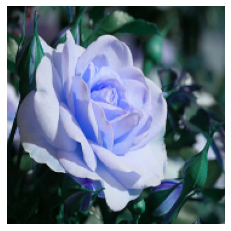

In [45]:
plt.axis('off')
plt.imshow(X[0])


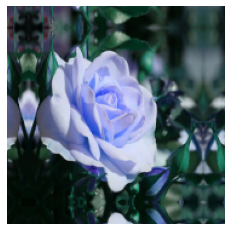

In [46]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [47]:
data_augmentation = keras.Sequential([
    tf.keras.layers.RandomRotation(0.3)
])

## **Improve Test Accuracy Using Data Augmentation**


In [51]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.3)
   
  ]
)


Original Image

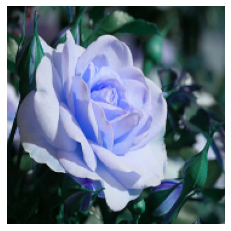

In [52]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

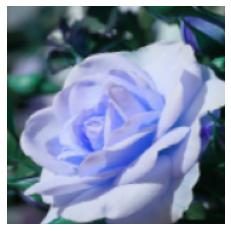

In [53]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# **005 Train the model using data augmentation and a drop out layer**


In [54]:
cnn = keras.Sequential([
    #cnn layers
    data_augmentation,
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='same', activation='relu'),               #padding=valid vs same       #convulation layer-----detecting features
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3),strides=(1,1),padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),

    layers.Dropout(0.2),

    #dense network
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5)
    ])

cnn.compile(
    optimizer = 'adam',
    loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),             #if Y is one hot encoded then use 'categorical cross entropy' otherwise 'sparse categorical crossentropy'
    metrics = ['accuracy']
    )
cnn.fit(X_train_scaled, Y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 5s 49ms/step - loss: 1.3068 - accuracy: 0.4146
Epoch 2/30
86/86 [==============================] - 5s 61ms/step - loss: 1.0548 - accuracy: 0.5843
Epoch 3/30
86/86 [==============================] - 4s 48ms/step - loss: 0.9627 - accuracy: 0.6141
Epoch 4/30
86/86 [==============================] - 4s 48ms/step - loss: 0.9220 - accuracy: 0.6312
Epoch 5/30
86/86 [==============================] - 6s 66ms/step - loss: 0.8766 - accuracy: 0.6566
Epoch 6/30
86/86 [==============================] - 4s 48ms/step - loss: 0.8411 - accuracy: 0.6719
Epoch 7/30
86/86 [==============================] - 5s 54ms/step - loss: 0.8005 - accuracy: 0.7006
Epoch 8/30
86/86 [==============================] - 6s 65ms/step - loss: 0.8008 - accuracy: 0.6933
Epoch 9/30
86/86 [==============================] - 4s 49ms/step - loss: 0.7701 - accuracy: 0.6991
Epoch 10/30
86/86 [==============================] - 5s 54ms/step - loss: 0.7572 - accuracy: 0.7133
Epoch 11/

In [55]:
cnn.evaluate(X_test_scaled,Y_test)

29/29 [==============================] - 1s 17ms/step - loss: 0.7159 - accuracy: 0.7342


[0.7158799767494202, 0.7342047691345215]

In [56]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, Y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 6s 59ms/step - loss: 1.4163 - accuracy: 0.3783
Epoch 2/30
86/86 [==============================] - 4s 45ms/step - loss: 1.1496 - accuracy: 0.5124
Epoch 3/30
86/86 [==============================] - 4s 41ms/step - loss: 1.0690 - accuracy: 0.5843
Epoch 4/30
86/86 [==============================] - 4s 42ms/step - loss: 1.0035 - accuracy: 0.6108
Epoch 5/30
86/86 [==============================] - 5s 54ms/step - loss: 0.9260 - accuracy: 0.6417
Epoch 6/30
86/86 [==============================] - 4s 41ms/step - loss: 0.8829 - accuracy: 0.6606
Epoch 7/30
86/86 [==============================] - 4s 42ms/step - loss: 0.8389 - accuracy: 0.6664
Epoch 8/30
86/86 [==============================] - 5s 56ms/step - loss: 0.8286 - accuracy: 0.6813
Epoch 9/30
86/86 [==============================] - 4s 41ms/step - loss: 0.7997 - accuracy: 0.6955
Epoch 10/30
86/86 [==============================] - 4s 41ms/step - loss: 0.7827 - accuracy: 0.6871
Epoch 11/

In [57]:
model.evaluate(X_test_scaled,Y_test)

29/29 [==============================] - 1s 14ms/step - loss: 0.8101 - accuracy: 0.7113


[0.8101203441619873, 0.7113289833068848]